<a href="https://colab.research.google.com/github/MSR806/iBHubs_AI/blob/main/Pandas/7.%20Pandas_Coding_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Data Analysis Process

Broadly, data analysis involves the following phases:
1. Question Phase - Asking questions
2. Wrangling Phase
  - Data Acquisition - Acquiring the data required to answer the question by various means
  - Data Cleaning - Cleaning the data so it can be used for further analysis
3. Data Exploration Phase - Getting familiar with the data, building intuition and finding patterns.
4. Drawing Conclusions Phase  - Arriving at conclusions based on the data or making some predictions. This phase usually involves statisitics or Machine Learning.
5. Communication Phase - Communicating your findings with the help of PPTs, blog posts etc. Data visualization can be very useful here.


**This process is not always done in this order.**

There can be a lot of going back and forth between the different phases. Especially the Wrangling Phase and Data Exploration Phase.
  - To clean problems in the data, you first need to explore the data to see what problems are there.
  - When you think you are done cleaning the data and you start exploring, you are likely to find more problems in the data, and you'll have to go back and clean the data.

Also, throughout the process, as you become more familiar with the dataset, you may need to go back and refine the question you're asking.

# Analysis On the Shopping Dataset


Sometimes data acquistion may come before you pose a question. If a new dataset is released, you may acquire the data first and then think of some questions that can be answered with the data. 

In this assignment, you'll be answering some interesting questions on the shopping dataset.

In [2]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/sales_data.csv

--2021-01-07 07:39:20--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/sales_data.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.62.7
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.62.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32406147 (31M) [text/csv]
Saving to: ‘sales_data.csv’

sales_data.csv      100%[===================>]  30.90M  7.68MB/s    in 4.0s    

2021-01-07 07:39:25 (7.68 MB/s) - ‘sales_data.csv’ saved [32406147/32406147]



In [3]:
shopping_df = pd.read_csv("sales_data.csv")
shopping_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502.0,iPhone,1.0,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503.0,AA Batteries (4-pack),1.0,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504.0,27in 4K Gaming Monitor,1.0,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505.0,Lightning Charging Cable,1.0,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506.0,AA Batteries (4-pack),2.0,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
372985,295660.0,AAA Batteries (4-pack),2.0,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
372986,295661.0,USB-C Charging Cable,1.0,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
372987,295662.0,Lightning Charging Cable,1.0,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
372988,295663.0,AAA Batteries (4-pack),1.0,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


# Getting Started with Matplotlib

* **plt.bar():** Make a bar plot.
* **plt.plot():** Can be used to make a line graph.

_____________________________________________________________________________
* **plt.xticks():** A list of positions at which ticks should be placed.
* **plt.xlabel(label_name):** Set the label for the x-axis.
* **plt.ylabel(label_name):** Set the label for the y-axis.

* **plt.show():** Display a figure.
* **plt.grid():** Configure the grid lines.

______________________________________________________________________________

* **plt.subplots():** Add a subplot to the current figure. It returns two arguments fig and ax where fig is figure and ax can be either a single Axes object or an array of Axes objects.
* **ax.twinx():** Creates a twin Axes sharing the xaxis.
* **ax.set_xlabel():** Set the label for the x-axis.
* **ax.set_ylabel():** Set the label for the y-axis.
* **ax.set_xticklabels():** Set the xaxis' labels with list of string labels.



### ***Refer to the [matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/index.html) for more details.***

## **Example 1**


5 students' marks are plotted on a bar graph.

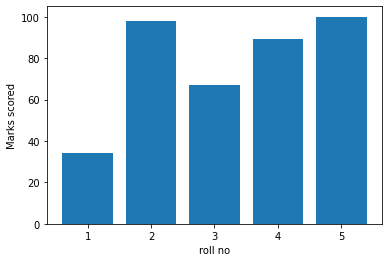

In [4]:
import matplotlib.pyplot as plt
marks_scored = [34, 98, 67, 89, 100]
roll_no = range(1, 6)
plt.bar(roll_no, marks_scored)
plt.xticks(roll_no)
plt.xlabel('roll no')
plt.ylabel('Marks scored')
plt.show()

## **Example 2**

Plot y versus x as lines and/or markers.

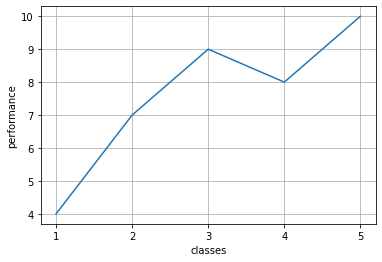

In [5]:
classes = [1,2,3,4,5]
performance = [4, 7, 9, 8, 10]

plt.plot(classes, performance)
plt.xticks(classes)
plt.xlabel('classes')
plt.ylabel('performance')
plt.grid()
plt.show()

## **Example 3**

Create a set of subplots in a single graph

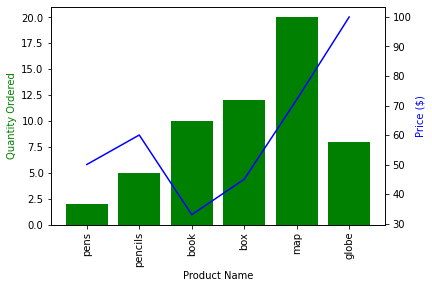

In [6]:
prices = [50, 60, 33, 45, 72, 100]
quantity = [2, 5, 10, 12, 20, 8]
products = ['pens', 'pencils', 'book', 'box', 'map', 'globe']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical')

plt.show()

#**Question 1:** 

**What was the best month for sales? How much was earned that month?**

 ## Cleaning the data: 
* Ensure that there are no rows that contain all NaN values in the data
* Ensure that the columns are of the appropriate data types
* Add new columns if needed



In [9]:
shopping_df.dropna(how='all', inplace=True)

##Analysis:
* Add a `Sales` column that contains the total cost of an order.
* Find the month which has the highest sales and print the sales along with the name of the month.


In [68]:
shopping_df['Sales'] = shopping_df['Quantity Ordered'] * shopping_df['Price Each']

shopping_df['Order Date'] = pd.to_datetime(shopping_df['Order Date'])
shopping_df['month'] = shopping_df['Order Date'].dt.month_name()

month_wise_sales = shopping_df.groupby('month')['Sales']

print(month_wise_sales.sum().idxmax(), ":- " , month_wise_sales.sum().max())

December :-  9226886.680003785


 ## Plotting:
* Plot a bar graph between months and sales to get a visual understanding of how sales have changed over the course of the year.

**Note:** To plot the graph, you can use the matplotlib library. Refer to ***Getting Started with Matplotlib*** for further details.

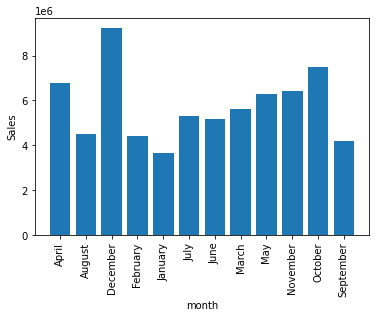

In [60]:
Sales = shopping_df.groupby('month')['Sales'].sum()
months = list(shopping_df.groupby('month').groups.keys())

import matplotlib.pyplot as plt

plt.bar(months, Sales)
plt.xticks(months, rotation= 90)
plt.xlabel('month')
plt.ylabel('Sales')
plt.show()

#**Question 2**: 

**Which city had the highest number of sales?**

 ## Cleaning the data: 
* Add new columns if needed




In [26]:
df2 = shopping_df["Purchase Address"].apply(lambda x: x.split(", "))
shopping_df['City'] = df2.apply(lambda x: x[1])

##Analysis:
* Find the total number of sales in each city.
* Find the city which has the maximum number of sales.


In [69]:
shopping_df.groupby('City')['Sales'].sum()

City
Atlanta          5.590997e+06
Austin           3.639164e+06
Boston           7.323284e+06
Dallas           5.535951e+06
Los Angeles      1.090514e+07
New York City    9.328635e+06
Portland         4.640981e+06
San Francisco    1.652441e+07
Seattle          5.495511e+06
Name: Sales, dtype: float64

In [70]:
shopping_df.groupby('City')['Sales'].sum().idxmax()

'San Francisco'

 ## Plotting:
* Plot a bar graph between cities and sales to get a visual understanding of the sales in different cities.

**Note:** To plot the graph, you can use the matplotlib library. Refer to the section **_Getting Started with Matplotlib_** for further details.

In [42]:
shopping_df.groupby('City').groups.keys()

dict_keys(['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle'])

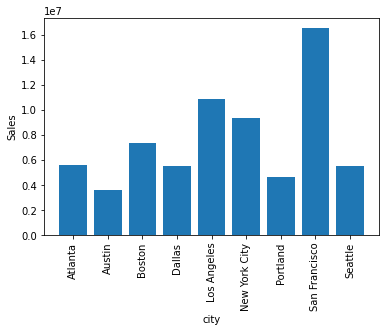

In [48]:
Sales = shopping_df.groupby('City')['Sales'].sum()
city = list(shopping_df.groupby('City').groups.keys())

import matplotlib.pyplot as plt

plt.bar(city, Sales)
plt.xticks(city, rotation=90)
plt.xlabel('city')
plt.ylabel('Sales')
plt.show()